## Imports DecisionTreeClassifier class from sklearn package

In [9]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [59]:
#import necessary libraries
import numpy as np
import pandas as pd
#to plot scatter graph
import matplotlib.pyplot as plt
import matplotlib.colors
#feature selection
from sklearn.feature_selection import SelectFromModel
#visualize decision tree
import pydotplus
from IPython.display import Image
#in-built class where entire decision tree algorithm is coded
from sklearn.tree import DecisionTreeClassifier
#to split the datasets into train & test datas
from sklearn.model_selection import train_test_split
#to export trained model in DOT model
from sklearn import tree
#accuracy, recall, precision, F1-score measures & confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [60]:
#import dataset
data = pd.read_csv("frogs_mfcc.csv")

In [61]:
#checking shape of array
print(data.shape)

(7195, 23)


In [62]:
#checking datasets with head() function
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,AdenomeraAndre


## Plots scatter graph with examples (to show the relationship between features)

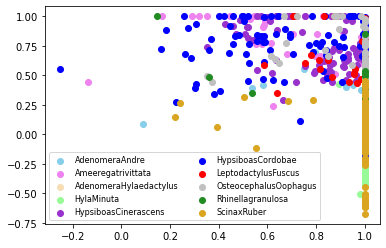

In [21]:
#scatter plot of MFCCs_1 and MFCCs_2
s1 = plt.scatter(data[0:672,0],            data[0:672,1],color='skyblue')
s2 = plt.scatter(data[672:4150,0],     data[672:4150,1],   color='violet')
s3 = plt.scatter(data[4150:4692,0],   data[4150:4692,1], color='wheat')
s4 = plt.scatter(data[4692:5002,0],   data[4692:5002,1], color='palegreen')
s5 = plt.scatter(data[5002:5474,0],   data[5002:5474,1], color='darkorchid')
s6 = plt.scatter(data[5474:6595,0],   data[5474:6595,1], color='blue')
s7 = plt.scatter(data[6595:6895,0],   data[6595:6895,1], color='red')
s8 = plt.scatter(data[6895:6979,0],   data[6895:6979,1], color='silver')
s9 = plt.scatter(data[6979:7047,0],   data[6979:7047,1], color='forestgreen')
s10 = plt.scatter(data[7047:7195,0], data[7047:7195,1], color='goldenrod')
plt.legend((s1,s2,s3,s4,s5,s6,s7,s8,s9,s10),
                   ('AdenomeraAndre', 'Ameeregatrivittata', 'AdenomeraHylaedactylus', 'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa', 'ScinaxRuber'),
                  scatterpoints = 1,
                  ncol = 2,
                  fontsize = 8)
plt.show()

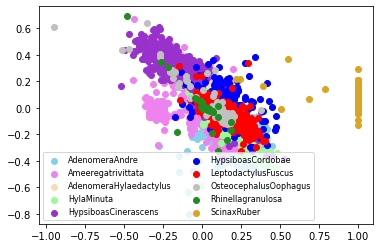

In [20]:
#scatter plot of MFCCs_10 and MFCCs_12
s1 = plt.scatter(data[0:672,9],            data[0:672,11],         color='skyblue')
s2 = plt.scatter(data[672:4150,9],     data[672:4150,11],   color='violet')
s3 = plt.scatter(data[4150:4692,9],   data[4150:4692,11], color='wheat')
s4 = plt.scatter(data[4692:5002,9],   data[4692:5002,11], color='palegreen')
s5 = plt.scatter(data[5002:5474,9],   data[5002:5474,11], color='darkorchid')
s6 = plt.scatter(data[5474:6595,9],   data[5474:6595,11], color='blue')
s7 = plt.scatter(data[6595:6895,9],   data[6595:6895,11], color='red')
s8 = plt.scatter(data[6895:6979,9],   data[6895:6979,11], color='silver')
s9 = plt.scatter(data[6979:7047,9],   data[6979:7047,11], color='forestgreen')
s10 = plt.scatter(data[7047:7195,0], data[7047:7195,11], color='goldenrod')
plt.legend((s1,s2,s3,s4,s5,s6,s7,s8,s9,s10),
                   ('AdenomeraAndre', 'Ameeregatrivittata', 'AdenomeraHylaedactylus', 'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa', 'ScinaxRuber'),
                  scatterpoints = 1,
                  ncol = 2,
                  fontsize = 8)
plt.show()

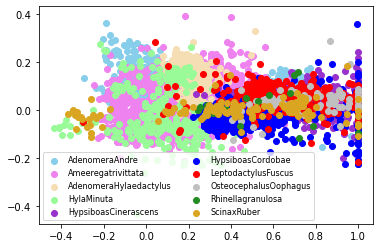

In [22]:
#scatter plot of MFCCs_3 and MFCCs_21
s1 = plt.scatter(data[0:672,2],            data[0:672,20],         color='skyblue')
s2 = plt.scatter(data[672:4150,2],     data[672:4150,20],   color='violet')
s3 = plt.scatter(data[4150:4692,2],   data[4150:4692,20], color='wheat')
s4 = plt.scatter(data[4692:5002,2],   data[4692:5002,20], color='palegreen')
s5 = plt.scatter(data[5002:5474,2],   data[5002:5474,20], color='darkorchid')
s6 = plt.scatter(data[5474:6595,2],   data[5474:6595,20], color='blue')
s7 = plt.scatter(data[6595:6895,2],   data[6595:6895,20], color='red')
s8 = plt.scatter(data[6895:6979,2],   data[6895:6979,20], color='silver')
s9 = plt.scatter(data[6979:7047,2],   data[6979:7047,20], color='forestgreen')
s10 = plt.scatter(data[7047:7195,2], data[7047:7195,20], color='goldenrod')
plt.legend((s1,s2,s3,s4,s5,s6,s7,s8,s9,s10),
                   ('AdenomeraAndre', 'Ameeregatrivittata', 'AdenomeraHylaedactylus', 'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa', 'ScinaxRuber'),
                  scatterpoints = 1,
                  ncol = 2,
                  fontsize = 8)
plt.show()

## Feature Selection

In [63]:
#assigning the multi variables
data = data.values

In [64]:
#dividing features and target variables
features = data[0:, 0:22]
target = data[:, -1].reshape(data.shape[0], 1)

In [91]:
#creates an decision tree classifier object for feature selection
split = DecisionTreeClassifier(criterion="gini")

In [92]:
#creates a sample model to split dataset
model = split.fit(features, target)
split.feature_importances_
model = SelectFromModel(split, prefit=True)
#new features variable after feature selection
newfeatures = model.transform(features)
newfeatures.shape

(7195, 8)

## Split datasets into train & test datasets by 7:3 

In [93]:
#spilting datasets into train datas & test datas
features_train, features_test, target_train, target_test = train_test_split(newfeatures, target, train_size = 0.7, random_state = 0)

In [94]:
#checking data split
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(5036, 8)
(2159, 8)
(5036, 1)
(2159, 1)


## Implements Decision Tree with selected test datasets

In [102]:
dectree = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=10)
model = dectree.fit(features_train, target_train)

## Predicts test datas with decision tree

In [103]:
#append train datasets into 1 array
test = np.append(features_test, target_test, axis=1)
print(features_test.shape)

(2159, 8)


In [104]:
#predict the target for test datasets
predict = model.predict(features_test)
prob = model.predict_proba(features_test)

In [105]:
#export predicted target into excel file
df = pd.DataFrame(predict)
dfprob = pd.DataFrame(prob)
df.to_excel(excel_writer = "Prediction.xlsx")
dfprob.to_excel(excel_writer = "Probability.xlsx")

## Visualizes the decision tree in figure form

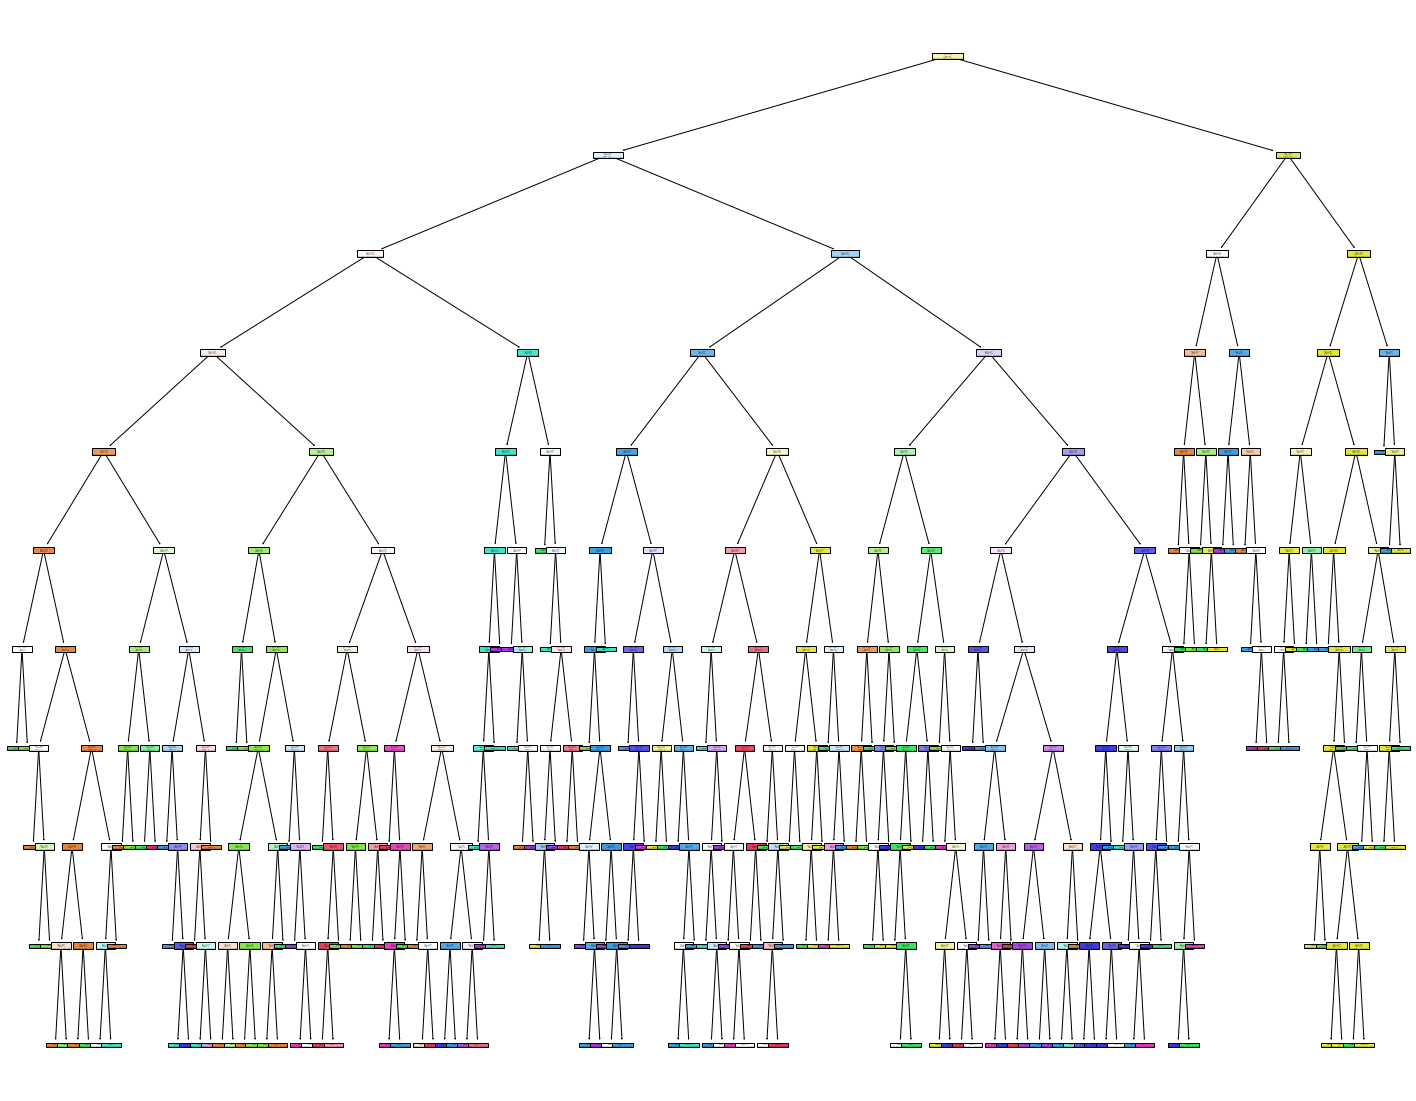

In [106]:
#visualizes the desicion tree in figure form
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dectree, 
                               filled=True)

In [79]:
#save decision tree figure as image file
fig.savefig("decision_tree.png")

## Calculations of accuracy, recall, precision, F1-score measures & confusion matrix

In [107]:
#accuracy, recall, precision, F1-score measures & confusion matrix

#Displays accuracy
print("Analysis for Decision Tree:")
print("------------------------------------")
print("Accuracy: " + str(accuracy_score(target_test, predict)) + "\n")

#displays precision, recall, F1-score measures, support
print(classification_report(target_test, predict))

#Displays confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(target_test, predict))

Analysis for Decision Tree:
------------------------------------
Accuracy: 0.9240389069013432

                        precision    recall  f1-score   support

        AdenomeraAndre       0.89      0.91      0.90       211
AdenomeraHylaedactylus       0.99      0.99      0.99      1029
    Ameeregatrivittata       0.88      0.92      0.90       155
            HylaMinuta       0.77      0.72      0.74        96
  HypsiboasCinerascens       0.93      0.85      0.89       151
     HypsiboasCordobae       0.94      0.90      0.92       335
   LeptodactylusFuscus       0.78      0.84      0.81        87
 OsteocephalusOophagus       0.46      0.64      0.54        28
     Rhinellagranulosa       0.75      0.75      0.75        20
           ScinaxRuber       0.79      0.81      0.80        47

              accuracy                           0.92      2159
             macro avg       0.82      0.83      0.82      2159
          weighted avg       0.93      0.92      0.92      2159


Confu